# Programming for Data Analysis Project 2019

![Image](Images/pythonpandas.JPG "Image")


## Problem Statement

Create a data set by simulating a real-word phenomenon. Rather than collect data associated with the choosen real-world phenomenon the data should be modeled and synthesise the data using Python **numpy.randon** package



## ECAS Call Centre

The real world phenomenon we will be looking at is the Irish Emergency Call Answering Service (ECAS). This is a 24hr 365 day a year service.

References: 
https://www.dccae.gov.ie/en-ie/news-and-media/press-releases/Pages/Minister-Denis-Naughten-Publishes-New-Figures-on-Ireland%E2%80%99s-Emergency-Call-Answering-Service.aspx

References
https://towardsdatascience.com/learning-to-simulate-c53d8b393a56


## Real world phenomenon simulated

The real-world pheomenon choose to simulate is an emergency call answering service or ecas. The call centre will have the following variables and is open 24 hours 7 days a week and 365 days of the year

1. period
2. garda
3. fire
4. ambulance
5. coast_guard
6. total_calls

To simulate the call centre we are going to use the Poisson Distribution. This distrbution is used to model 

References: 
https://en.wikipedia.org/wiki/Poisson_distribution


In [1]:
#The following Python packages are imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The period of a week is choosen starting from the 1st January 2019, the week is divided up in to hourly periods 
#given 145 data points for the week

period =  pd.date_range('01-01-2017', '01-07-2017', freq='H')

#Reference: 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
#https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [3]:
#period_week datetime index is printed out
period

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-01-06 15:00:00', '2017-01-06 16:00:00',
               '2017-01-06 17:00:00', '2017-01-06 18:00:00',
               '2017-01-06 19:00:00', '2017-01-06 20:00:00',
               '2017-01-06 21:00:00', '2017-01-06 22:00:00',
               '2017-01-06 23:00:00', '2017-01-07 00:00:00'],
              dtype='datetime64[ns]', length=145, freq='H')

In [4]:
#Normal distrbution example
mu, sigma = 1.0 , 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([111.5, 111.6, 111.7, 111.8, 111.9, 112. , 112.1, 112.2, 112.3,
        112.4, 112.5]),
 <a list of 10 Patch objects>)

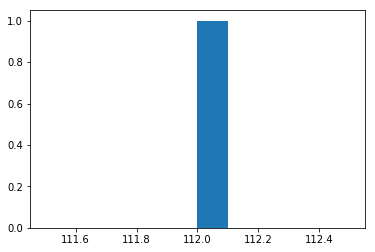

In [5]:
#Define a random integer for the Poisson distrubution lamda value for calls for a garda emergency.
garda_randomint = np.random.randint(45, 185)
garda_randomint

plt.hist(garda_randomint)

#Reference: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

In [6]:
#Construct the ecas_garda dataframe using Numpy random.poisson function in Python. The length of the dataframe is the amount
#time intervals in the time_period defined above. The index of the Dataframe is again the time_period time index variable.
# The resulting poisson distribution values are labelled "garda"

#df = pd.DataFrame(period, columns=['datetime'])
#df['data'] = np.random.randint(0,100,size=(len(period)))

ecas_garda = pd.DataFrame(period, columns=['datetime'])
ecas_garda['garda'] = np.random.poisson(garda_randomint, len(period))
ecas_garda.head()

#df.dtypes

#Reference: 
#https://web.microsoftstream.com/video/db8801fe-9e42-4663-a508-5d6f38bb7327
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.poisson.html

,datetime,garda
0,2017-01-01 00:00:00,111
1,2017-01-01 01:00:00,100
2,2017-01-01 02:00:00,116
3,2017-01-01 03:00:00,106
4,2017-01-01 04:00:00,115


In [7]:
#pd.to_datetime(df)




In [8]:
#Define a random integer for the Poisson distribution lamda value for calls for a fire emergency call.
fire_randomint = np.random.randint(50,160)
fire_randomint

#Reference: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

61

In [9]:
#Construct the ecas_fire dataframe using Numpy random.poisson function in Python. The length of the dataframe is the amount
#time intervals in the time_period defined above. The index of the Dataframe is again the time_period time index variable.
# The resulting poisson distribution values are labelled "fire"
ecas_fire = pd.DataFrame(np.random.poisson(fire_randomint, len(period)), index=period, columns=["fire"])
ecas_fire.head()

#Reference: 
#https://web.microsoftstream.com/video/db8801fe-9e42-4663-a508-5d6f38bb7327
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.poisson.html

,fire
2017-01-01 00:00:00,66
2017-01-01 01:00:00,54
2017-01-01 02:00:00,78
2017-01-01 03:00:00,58
2017-01-01 04:00:00,57


In [10]:
#Define a random integer for the Poisson distrubution lamda value for calls for a ambulance emergency call.
ambulance_randomint = np.random.randint(35,270)
ambulance_randomint

#Reference: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

83

In [11]:
#Construct the ecas_ambulance dataframe using Numpy random.poisson function in Python. The length of the dataframe is the amount
#time intervals in the time_period defined above. The index of the Dataframe is the time_period time index variable.
# The resulting poisson distribution values are labelled "ambulance"
ecas_ambulance = pd.DataFrame(np.random.poisson(ambulance_randomint, len(period)), index=period, columns=["ambulance"])
ecas_ambulance.head()

#Reference: 
#https://web.microsoftstream.com/video/db8801fe-9e42-4663-a508-5d6f38bb7327
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.poisson.html

,ambulance
2017-01-01 00:00:00,92
2017-01-01 01:00:00,92
2017-01-01 02:00:00,80
2017-01-01 03:00:00,79
2017-01-01 04:00:00,71


In [12]:
#Define a random integer for the Poisson distrubution lamda value for calls for a coast_guard emergency call.
coast_guard_randomint = np.random.randint(30, 265)
coast_guard_randomint

#Reference: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

214

In [13]:
#Construct the ecas_coast_guard dataframe using Numpy random.poisson function in Python. The length of the dataframe is the amount
#time intervals in the time_period defined above. The index of the Dataframe is the time_period time index variable.
# The resulting poisson distribution values are labelled "coast_guard"
ecas_coast_guard = pd.DataFrame(np.random.poisson(coast_guard_randomint, len(period)), index=period, columns=["coast_guard"])
ecas_coast_guard.head()

#Reference: 
#https://web.microsoftstream.com/video/db8801fe-9e42-4663-a508-5d6f38bb7327
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.poisson.html

,coast_guard
2017-01-01 00:00:00,235
2017-01-01 01:00:00,219
2017-01-01 02:00:00,224
2017-01-01 03:00:00,201
2017-01-01 04:00:00,201


In [14]:
ecas = ecas_garda
ecas.head()

,datetime,garda
0,2017-01-01 00:00:00,111
1,2017-01-01 01:00:00,100
2,2017-01-01 02:00:00,116
3,2017-01-01 03:00:00,106
4,2017-01-01 04:00:00,115


In [15]:
# Creating an array of values from the Dataframe ecas_fire
# Reference: https://stackoverflow.com/questions/46396257/adding-a-new-column-in-pandas-dataframe-from-another-dataframe-with-differing-in
ecas_fire['fire'].values

array([66, 54, 78, 58, 57, 49, 62, 51, 51, 56, 49, 62, 60, 55, 59, 63, 79,
       68, 57, 52, 56, 56, 52, 67, 67, 47, 49, 49, 49, 52, 59, 52, 52, 70,
       52, 68, 49, 75, 57, 78, 59, 50, 57, 66, 55, 60, 64, 65, 64, 58, 52,
       61, 67, 46, 57, 69, 56, 58, 66, 60, 63, 60, 56, 57, 58, 57, 52, 59,
       72, 81, 58, 59, 59, 63, 57, 64, 57, 54, 65, 71, 58, 60, 65, 65, 54,
       73, 53, 61, 55, 73, 60, 58, 67, 72, 76, 56, 48, 71, 61, 67, 56, 66,
       65, 64, 58, 62, 65, 70, 58, 71, 58, 58, 63, 70, 52, 68, 62, 51, 64,
       63, 60, 70, 71, 62, 73, 61, 60, 46, 67, 57, 62, 74, 52, 71, 64, 54,
       55, 64, 64, 66, 65, 46, 56, 66, 56])

In [16]:
ecas_ambulance['ambulance'].values

array([ 92,  92,  80,  79,  71,  73,  81,  82,  88,  80,  81,  87,  82,
        90,  75,  81,  87,  92,  92,  90,  87,  84,  72,  91,  77,  80,
        76,  81,  96,  98,  91,  76,  93,  78,  89,  70,  71,  84,  84,
        79,  84,  80,  93,  98,  77,  81,  87,  81,  90,  71, 100,  77,
        75,  86,  87,  90,  94,  90,  86,  84,  92,  84,  70,  78,  84,
        82,  71,  79,  94,  79,  84,  83,  97,  79,  96,  78,  88,  77,
        82,  88,  90,  85,  89,  75,  93,  92,  88,  89,  75,  92,  84,
        65,  84,  85,  71,  72,  82,  95,  78,  93,  74,  77,  88,  75,
        95,  86,  82,  81,  79,  86,  75,  98,  74,  94,  77,  73, 101,
       100,  86,  83,  75,  86,  88,  88,  72,  69,  86,  89,  88,  88,
        82,  94,  92,  90,  91,  82,  89, 104,  92,  76,  77,  74,  75,
        81,  84])

In [17]:
# Adding the fire columns to the ecas Dataframe, the ecas columns will consist of police and fire
ecas['fire'] = ecas_fire['fire'].values
ecas.head()

,datetime,garda,fire
0,2017-01-01 00:00:00,111,66
1,2017-01-01 01:00:00,100,54
2,2017-01-01 02:00:00,116,78
3,2017-01-01 03:00:00,106,58
4,2017-01-01 04:00:00,115,57


In [18]:
# Creating an array of values from the Dataframe ecas_ambulance
# Reference: https://stackoverflow.com/questions/46396257/adding-a-new-column-in-pandas-dataframe-from-another-dataframe-with-differing-in
ecas['ambulance'] = ecas_ambulance['ambulance'].values
ecas.head()

,datetime,garda,fire,ambulance
0,2017-01-01 00:00:00,111,66,92
1,2017-01-01 01:00:00,100,54,92
2,2017-01-01 02:00:00,116,78,80
3,2017-01-01 03:00:00,106,58,79
4,2017-01-01 04:00:00,115,57,71


In [19]:
# Adding the ambulance columns to the ecas Dataframe, the ecas columns will consist of garda, fire and ambulance
ecas['ambulance'] = ecas_ambulance['ambulance'].values
ecas.head()

,datetime,garda,fire,ambulance
0,2017-01-01 00:00:00,111,66,92
1,2017-01-01 01:00:00,100,54,92
2,2017-01-01 02:00:00,116,78,80
3,2017-01-01 03:00:00,106,58,79
4,2017-01-01 04:00:00,115,57,71


In [20]:
# Creating an array of values from the Dataframe ecas_coast_guard
# Reference: https://stackoverflow.com/questions/46396257/adding-a-new-column-in-pandas-dataframe-from-another-dataframe-with-differing-in
ecas_coast_guard['coast_guard'].values

array([235, 219, 224, 201, 201, 192, 214, 215, 197, 207, 222, 217, 240,
       201, 208, 223, 197, 201, 201, 213, 206, 223, 213, 210, 220, 239,
       202, 216, 250, 248, 237, 227, 194, 224, 199, 213, 182, 223, 197,
       214, 206, 193, 207, 219, 213, 209, 212, 198, 216, 208, 229, 217,
       211, 205, 206, 231, 216, 209, 229, 203, 234, 215, 200, 196, 220,
       225, 206, 225, 223, 224, 236, 202, 204, 200, 211, 212, 216, 232,
       204, 210, 225, 198, 212, 209, 207, 227, 207, 211, 211, 228, 224,
       188, 210, 205, 209, 211, 199, 222, 241, 203, 232, 219, 224, 211,
       188, 221, 222, 201, 202, 200, 186, 214, 240, 213, 204, 208, 205,
       201, 199, 218, 240, 200, 217, 233, 197, 223, 207, 207, 218, 232,
       210, 228, 234, 182, 206, 181, 231, 223, 200, 225, 205, 228, 227,
       224, 227])

In [21]:
# Adding the coast_guard column to the ecas Dataframe, the ecas columns will consist of garda, fire, ambulance and coast_guard
ecas['coast_guard'] = ecas_coast_guard['coast_guard'].values
ecas.head()

,datetime,garda,fire,ambulance,coast_guard
0,2017-01-01 00:00:00,111,66,92,235
1,2017-01-01 01:00:00,100,54,92,219
2,2017-01-01 02:00:00,116,78,80,224
3,2017-01-01 03:00:00,106,58,79,201
4,2017-01-01 04:00:00,115,57,71,201


In [22]:
# Sum columns garda, fire, ambulance, coast_guard to give a new column total_calls
# Reference: https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns/34023971
ecas['total_calls'] = ecas['garda'] + ecas['fire'] + ecas['ambulance'] + ecas['coast_guard']

ecas

,datetime,garda,fire,ambulance,coast_guard,total_calls
0,2017-01-01 00:00:00,111,66,92,235,504
1,2017-01-01 01:00:00,100,54,92,219,465
2,2017-01-01 02:00:00,116,78,80,224,498
3,2017-01-01 03:00:00,106,58,79,201,444
4,2017-01-01 04:00:00,115,57,71,201,444
5,2017-01-01 05:00:00,134,49,73,192,448
6,2017-01-01 06:00:00,108,62,81,214,465
7,2017-01-01 07:00:00,106,51,82,215,454
8,2017-01-01 08:00:00,108,51,88,197,444
9,2017-01-01 09:00:00,109,56,80,207,452


In [23]:
ecas['total_calls'].sum()

68091

In [24]:
ecas.dtypes

datetime       datetime64[ns]
garda                   int32
fire                    int32
ambulance               int32
coast_guard             int32
total_calls             int32
dtype: object

In [25]:
ecas.describe()

,garda,fire,ambulance,coast_guard,total_calls
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,111.448276,60.641379,84.006897,213.496552,469.593103
std,10.258419,7.552295,7.894703,13.792673,21.743932
min,84.000000,46.000000,65.000000,181.000000,399.000000
25%,104.000000,56.000000,78.000000,204.000000,454.000000
50%,111.000000,60.000000,84.000000,212.000000,468.000000
75%,118.000000,66.000000,90.000000,224.000000,485.000000
max,140.000000,81.000000,104.000000,250.000000,519.000000


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


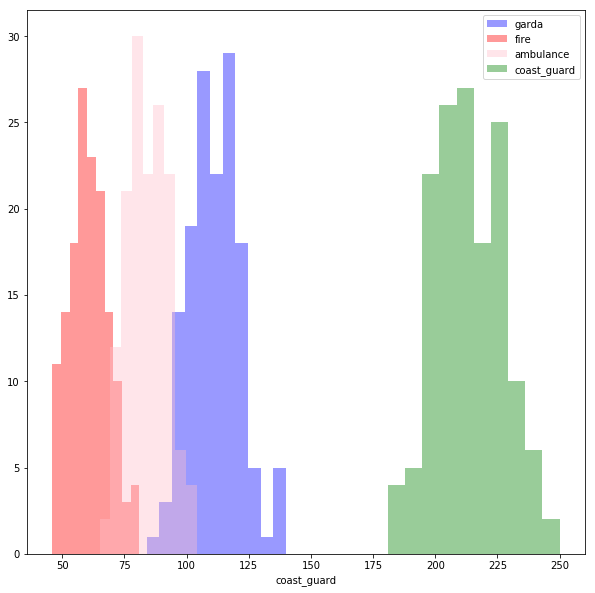

In [30]:
#sns.distplot(ecas['total_calls'], hist=True, kde=False, label = 'Total Calls', color='yellow')
plt.rcParams['figure.figsize'] = (10, 10)
sns.distplot(ecas['garda'], hist=True, kde=False, label = 'garda' , color='blue')
sns.distplot(ecas['fire'], hist=True, kde=False, label = 'fire' , color='red')
sns.distplot(ecas['ambulance'], hist=True, kde=False, label = 'ambulance' , color='pink')
sns.distplot(ecas['coast_guard'], hist=True, kde=False, label = 'coast_guard' , color='green')
plt.legend()

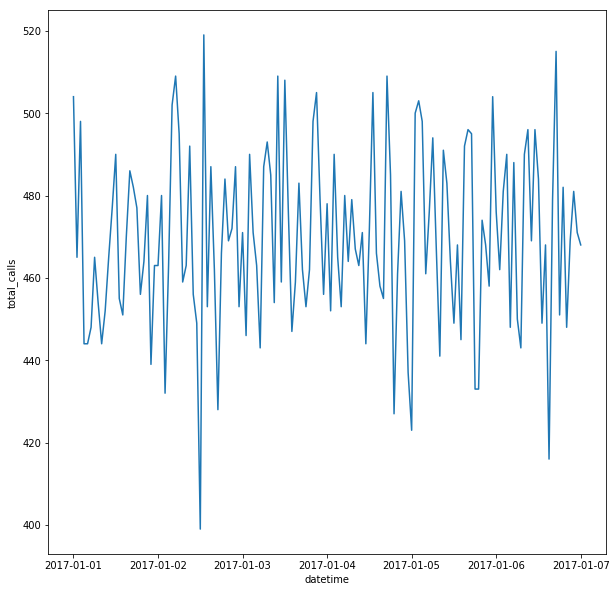

In [28]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.lineplot(x="datetime", y="total_calls", data=ecas)


In [29]:
chart = sns.countplot(
    ecas=ecas['datetime'],
    x='datetime',
    palette='Set1')

#Reference: https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

ValueError: Could not interpret input 'datetime'

## Average Call Duration

The average ECAS call duration is 7.57 in 2017 according to the Department of environment website below.

In this section we will build this in to out model to simulate how many agents need to be available so that no call is queued. 

There will be two more variables added to the ecas dataframe

1. total_avg_talk_time
2. agents_required

Reference: 
https://www.dccae.gov.ie/en-ie/news-and-media/press-releases/Pages/Minister-Denis-Naughten-Publishes-New-Figures-on-Ireland%E2%80%99s-Emergency-Call-Answering-Service.aspx

### Add talk_time and agent_required

The next section of code will add in talk_time and agents_required to the ecas dataframe.

In [ ]:
ecas['total_avg_talk_time'] = ecas['total_calls'] * 8
ecas.head()

In [ ]:
ecas_jan = ecas.loc['2018-01-01':'2018-01-31']
ecas_jan.head()

In [ ]:
ecas_jan['total_calls'].sum()

In [ ]:
ecas_jan.head()

In [ ]:
ecas[ecas.index.month == 1]['total_calls'].sum()

In [ ]:
ecas[ecas.index == '2018-01-01 00:00:00']['total_calls'].values

### Poisson Probability

The poisson probability of a call arriving in a particular interval can be calculated as follows:


In [ ]:

from scipy.special import factorial

time_p = '2018-01-01 00:00:00'

calls_per_min = ecas[ecas.index == time_p]['total_calls'].values/60

minutes = 5

# Expected events
#lam = calls_per_min[0] * minutes

#k = 2
#pk = np.exp(-lam) * np.power(lam, k) / factorial(k)
#print(f'The probability of {k} calls in {minutes} minutes is {100*pk:.2f}% for the time period {time_p}')

#Reference: https://github.com/WillKoehrsen/Data-Analysis/blob/master/poisson/poisson.ipynb